In [1]:
# To ensure that you have all the libraries installed, make sure this cell runs properly.
from xml.dom import minidom
import pandas as pd
import matplotlib
import numpy as np
from geopy.distance import geodesic
import googlemaps, gmplot, webbrowser, os, json
from googlemaps.convert import as_list
from sklearn.cluster import AffinityPropagation

<h3> Problem Definition </h3>

<p> This project was done as part of a hackathon organized by ShopUp. </p>

<p>ShopUp helps small businesses (merchants) by collecting their products and distributing them to their respective customers. This process goes through several steps.</p>

<p>Firstly, the merchants upload their product information on the system. Then, ShopUp sends delivery persons to the merchants to collect their products. The products are brought to one of the four hubs, which are situated at Mirpur, Kalabagan, Malibagh and Mohakhali respectively. Then, at around midnight, the products are distributed to the different hubs according to their respective delivery orders. Finally, in the morning, the products are dispatched for the customers from the hubs.</p>

<p>In total, ShopUp has to deal with 500-600 product deliveries on a single day. Our goal is to automate the sorting and scheduling process, which could significantly decrease the delivery cost and time.<p>

<h3> The dataset </h3>

<p>We collect the dataset from <i><strong>openstreetmap.org</strong></i>. The dataset consists of different random coordinates in Dhaka. We use <strong>281</strong> data points in total as delivery points.</p>

In [2]:
files = ['Bashundara_RA.osm', 'Dhanmondi.osm', 'Nakhalpara.osm', 'Mirpur.osm', 'Rampura.osm', 'Mogbazar.osm', 'Cantonment.osm', 'DU_Nilkhet.osm', 'Chankharpool.osm',  'Mohammadpur.osm', 'Shahbag.osm', 'Kolyanpur_1.osm', 'Kolyanpur_2.osm', 'Kamalapur.osm', 'Jatrabari.osm','Bashundhara_1.osm','Bashundhara_2.osm','Badda.osm']
dict_of_locations = {}
list_of_locations = []
dict_of_locations['latitude'] = []
dict_of_locations['longitude'] = []
dict_of_locations2 = {}
list_of_locations2 = list()
dict_of_locations2['lat'] = []
dict_of_locations2['lng'] = []

In [4]:
for filename in files:
    np.random.seed(1)
    xmldoc = minidom.parse('./data/' + filename)
    location_xml = xmldoc.getElementsByTagName('node')
    print('Reading data from', filename)
        
    for location in location_xml:
        if np.random.rand() < .0004:
            dict_of_locations['latitude'].append(float(location.attributes['lat'].value))
            dict_of_locations['longitude'].append(float(location.attributes['lon'].value))
            list_of_locations2.append((float(location.attributes['lat'].value),float(location.attributes['lon'].value)))
            list_of_locations.append([float(location.attributes['lat'].value), float(location.attributes['lon'].value)])
            
print('Total number of data points:', len(list_of_locations))

Reading data from Bashundara_RA.osm
Reading data from Dhanmondi.osm
Reading data from Nakhalpara.osm
Reading data from Mirpur.osm
Reading data from Rampura.osm
Reading data from Mogbazar.osm
Reading data from Cantonment.osm
Reading data from DU_Nilkhet.osm
Reading data from Chankharpool.osm
Reading data from Mohammadpur.osm
Reading data from Shahbag.osm
Reading data from Kolyanpur_1.osm
Reading data from Kolyanpur_2.osm
Reading data from Kamalapur.osm
Reading data from Jatrabari.osm
Reading data from Bashundhara_1.osm
Reading data from Bashundhara_2.osm
Reading data from Badda.osm
Total number of data points: 309


In [5]:
dataframe = pd.DataFrame(data = dict_of_locations)

In [6]:
dataframe.head()

,latitude,longitude
0,23.816826,90.406408
1,23.824691,90.415939
2,23.825535,90.416480
3,23.836510,90.424908
4,23.836900,90.424291


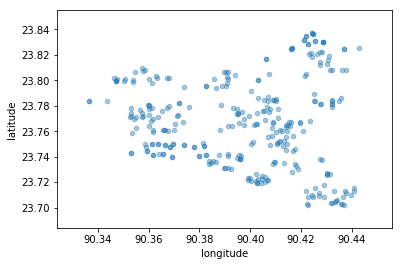

In [8]:
dataframe.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)


In [9]:
type(dataframe.iloc[0]['latitude'])

numpy.float64

In [10]:
np.random.rand()

0.13832473282721824

In [11]:
print(dataframe.describe())

         latitude   longitude
count  309.000000  309.000000
mean    23.766867   90.397415
std      0.034503    0.027216
min     23.702117   90.336471
25%     23.741067   90.370266
50%     23.766725   90.402711
75%     23.794235   90.422023
max     23.836900   90.443113


In [14]:
point1 = (23.751637, 90.380274)
point2 = (23.810144, 90.368230)
point3 = (23.778170, 90.398051)
point0 = (23.745740, 90.413446)

# Uncomment the folling line and add your key here
#gmaps = googlemaps.Client(key='') 
#
len(dict_of_locations['latitude'])


colors= ['red','blue','green', 'black','purple','orange','cyan','magenta','yellow','grey','pink','violet']

# Uncomment the folling line and add your key here
#gmaps = googlemaps.Client(key='') 
#

geocode_result = gmaps.geocode('Dhaka')

geom = geocode_result[0]['geometry']
loc = geom['location']
lat = loc['lat']
lng = loc['lng']

gmap = gmplot.GoogleMapPlotter(lat,lng,12.8)

gmap.scatter(lngs=list(np.array(dict_of_locations['longitude'])), lats=list(np.array(dict_of_locations['latitude'])),c = 'blue', alpha=0.4)
gmap.marker(point0[0],point0[1],c = 'red',title = "HUB 0")
gmap.marker(point1[0],point1[1],c = 'red',title = "HUB 1")
gmap.marker(point2[0],point2[1],c = 'red',title = "HUB 2")
gmap.marker(point3[0],point3[1],c = 'red', title = "HUB 3")
gmap.draw("./maps/mapOriginal.html")

In [15]:
choice = int(input("Enter What You Want To Optimize:\n1 for time \n2 for distance \n"))

Enter What You Want To Optimize:
1 for time 
2 for distance 
2


In [16]:
def dist(pointa, pointb,choice):
    a = (pointa[0], pointa[1])
    b = (pointb[0], pointb[1])
    #print(gmaps.distance_matrix(a,b))
    ch = ""
    if(choice == 1):
        ch = "duration"
    else:
        ch = "distance"
    dis = gmaps.distance_matrix(a,b)['rows'][0]['elements'][0][ch]['value']
    #print(dis)    
    return dis

In [19]:
szdis= len(list_of_locations2)
affinity_matrix = []
for i in range(len(list_of_locations2)):
    affinity_matrix.append([])
for i in range(len(list_of_locations2)):
    if i % 20:
        print(i/len(list_of_locations2) * 100, '% done')
    for j in range(0,len(list_of_locations2),100):
        affinity_matrix[i].append(gmaps.distance_matrix(origins = list_of_locations2[i], destinations = list_of_locations2[j : min( j+100,len(list_of_locations2))] ))

0.3236245954692557 % done
0.6472491909385114 % done
0.9708737864077669 % done
1.2944983818770228 % done
1.6181229773462782 % done
1.9417475728155338 % done
2.26537216828479 % done
2.5889967637540456 % done
2.912621359223301 % done
3.2362459546925564 % done
3.559870550161812 % done
3.8834951456310676 % done
4.207119741100324 % done
4.53074433656958 % done
4.854368932038835 % done
5.177993527508091 % done
5.501618122977346 % done
5.825242718446602 % done
6.148867313915858 % done
6.796116504854369 % done
7.119741100323624 % done
7.443365695792881 % done
7.766990291262135 % done
8.090614886731391 % done
8.414239482200648 % done
8.737864077669903 % done
9.06148867313916 % done
9.385113268608414 % done
9.70873786407767 % done
10.032362459546926 % done
10.355987055016183 % done
10.679611650485436 % done
11.003236245954692 % done
11.326860841423949 % done
11.650485436893204 % done
11.974110032362459 % done
12.297734627831716 % done
12.62135922330097 % done
13.268608414239482 % done
13.59223300

In [21]:
ch = ""
if(choice == 1):
    ch = "duration"
else:
    ch = "distance"
sz = len(list_of_locations2)
matrix = np.zeros((sz,sz))
for i in range(len(list_of_locations2)):
    cnt = 0
    for j in range(0,len(affinity_matrix[i])):
        if(j >= len(list_of_locations2)):
            continue
        for k in range(len(affinity_matrix[i][j]['rows'][0]['elements'])):
            matrix[i][cnt] = -affinity_matrix[i][j]['rows'][0]['elements'][k][ch]['value']**2
            cnt += 1
        

In [23]:
colorHub = [0]*sz
cnt = 0
for i in range(sz):
    if i%20 == 0:
        print(i/sz * 100, '% done.')
    save = [0]*4
    ans = 0
    save[0] = dist(point0,list_of_locations2[i], choice)
    mn = save[0]
    save[1] = dist(point1,list_of_locations2[i], choice)
    save[2] = dist(point2,list_of_locations2[i], choice)
    save[3] = dist(point3,list_of_locations2[i], choice)
    for j in range(4):
        if save[j]<mn:
            mn = save[j]
            ans = j
    colorHub[i] = ans

print(np.unique(colorHub, return_counts=True))

0.0 % done.
6.472491909385113 % done.
12.944983818770226 % done.
19.41747572815534 % done.
25.88996763754045 % done.
32.362459546925564 % done.
38.83495145631068 % done.
45.307443365695796 % done.
51.7799352750809 % done.
58.252427184466015 % done.
64.72491909385113 % done.
71.19741100323624 % done.
77.66990291262135 % done.
84.14239482200647 % done.
90.61488673139159 % done.
97.0873786407767 % done.
(array([0, 1, 2, 3]), array([84, 85, 43, 97]))


In [25]:
gmap = gmplot.GoogleMapPlotter(lat,lng,12.75)

for i in range(4):
    print(len(list(np.array(dict_of_locations['longitude'])[np.where(np.array(colorHub)==i)])))
    gmap.scatter( lngs=list(np.array(dict_of_locations['longitude'])[np.where(np.array(colorHub)==i)]), lats=list(np.array(dict_of_locations['latitude'])[np.where(np.array(colorHub)==i)]),c = colors[i], alpha=0.4)
gmap.marker(point0[0],point0[1],c = 'magenta',)
gmap.marker(point1[0],point1[1],c = 'cyan')
gmap.marker(point2[0],point2[1],c = 'brown')
gmap.marker(point3[0],point3[1],c = 'white')
gmap.draw("./maps/map_hubs_distribution_"+str(choice)+'.html')

84
85
43
97


<p>The delivery points are now partitioned into four clusters according to a distance metrics from the points to the hubs. Next we need to distribute the delivery points on a single hub into several delivery persons.<p> 

In [27]:
zoneDistribution = [[], [], [], []]
zoneDistributionDict = [{'lat':[], 'lng':[]},{'lat':[], 'lng':[]},{'lat':[], 'lng':[]},{'lat':[], 'lng':[]}]

for i in range(len(colorHub)):
    zoneDistribution[colorHub[i]].append(i)
    zoneDistributionDict[colorHub[i]]['lat'].append(list_of_locations2[i][0])
    zoneDistributionDict[colorHub[i]]['lng'].append(list_of_locations2[i][1])

            
    
print(zoneDistribution)


[[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 131, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 193, 194, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 66, 116, 128, 129, 130, 148, 149, 150, 151, 152, 153, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199, 200, 202, 203, 205, 206, 207, 212, 216, 218, 219, 220], [12, 40, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 133, 135, 136, 137, 138, 139, 140, 143, 144, 146, 147, 201, 204, 208, 209, 210, 211, 213, 214, 215, 

In [44]:
print('Input hub number: ')
zones = int(input())

Input hub number: 
3


In [45]:
sz = len(zoneDistribution[zones])
newMat = np.zeros((sz,sz))
rowCnt = 0
for i in range(len(zoneDistribution[zones])):
    columnCnt = 0
    for j in range(len(zoneDistribution[zones])):
        newMat[rowCnt][columnCnt] = matrix[zoneDistribution[zones][i]][zoneDistribution[zones][j]]
        columnCnt += 1
    rowCnt += 1


In [46]:
print(zoneDistribution)

[[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 131, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 193, 194, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 66, 116, 128, 129, 130, 148, 149, 150, 151, 152, 153, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199, 200, 202, 203, 205, 206, 207, 212, 216, 218, 219, 220], [12, 40, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 133, 135, 136, 137, 138, 139, 140, 143, 144, 146, 147, 201, 204, 208, 209, 210, 211, 213, 214, 215, 

In [47]:
# print(newMat)
# newMat /= ((-np.min(newMat)))
print(newMat)
af = AffinityPropagation( affinity='precomputed', preference =np.min(newMat), verbose = True, convergence_iter= 50).fit(newMat)
labels = af.labels_
print(np.unique(labels, return_counts=True))

[[ 0.00000000e+00 -2.56137210e+07 -2.44827040e+07 ... -5.10367360e+07
  -5.10367360e+07 -6.18110440e+07]
 [-7.99772490e+07  0.00000000e+00 -8.83600000e+03 ... -1.67857936e+08
  -1.67857936e+08 -1.64506276e+08]
 [-7.79512410e+07 -8.83600000e+03  0.00000000e+00 ... -1.64942649e+08
  -1.64942649e+08 -1.61594944e+08]
 ...
 [-4.65533290e+07 -6.61944960e+07 -6.43524840e+07 ...  0.00000000e+00
   0.00000000e+00 -2.09960100e+06]
 [-4.65533290e+07 -6.61944960e+07 -6.43524840e+07 ...  0.00000000e+00
   0.00000000e+00 -2.09960100e+06]
 [-4.85251560e+07 -6.85418410e+07 -6.66672250e+07 ... -2.09960100e+06
  -2.09960100e+06  0.00000000e+00]]
Converged after 96 iterations.
(array([0, 1, 2]), array([20, 44, 33]))


In [48]:
gmap = gmplot.GoogleMapPlotter(lat,lng,12.75)

for i in range(np.max(labels)+1):
    #print(len(list(np.array(zoneDistributionDict[zones]['longitude'])[np.where(np.array(labels)==i)])))
    gmap.scatter( lngs=list(np.array(zoneDistributionDict[zones]['lng'])[np.where(np.array(labels)==i)]), lats=list(np.array(zoneDistributionDict[zones]['lat'])[np.where(np.array(labels)==i)]),c = colors[i], alpha=0.4)
gmap.marker(point0[0],point0[1],c = 'magenta',)
gmap.marker(point1[0],point1[1],c = 'cyan')
gmap.marker(point2[0],point2[1],c = 'brown')
gmap.marker(point3[0],point3[1],c = 'white')
gmap.draw('./maps/mapHubRegionDist_' + str(zones)+'_' +str(choice)+ '.html')

<h3> Output </h3>
The outputs of the work are stored in the '/maps' folder.
<h3> Remaining Works </h3>
<ul>
<li>We have tried k-means, spectral and affinity propagation models for clustering the delivery points. There are several other models like Gaussian mixture, DBSCAN, JarvisPatrick, Birch and so on. We have yet to test which one is actually best in our country's context, where we have to deal with heavy traffic conditions and a very dense graph.</li>
<li>We have not yet integrated the part where the delivery persons collect the products from the merchants.</li>
<li>We have not yet implemented the interhub communication.</li>
</ul>

<h3>Thank you</h3>
<p>In this project, 
<list>
    <li>I, Muntasir Wahed, have dealt with the concept and modeling the solution.</li> 
    <li>Nahian Ashraf has dealt with data visualization and helped with the implementation.</li> 
    <li>Abid Naziri Sami has collected all data.</li>
</list>    
</p>

## Distance Function using geodesic
Run this only when necessary

In [210]:
def dest(PointA, PointB):
    A = (PointA[0], PointA[1])
    B = (PointB[0], PointB[1])
    return geodesic(A, B).miles

In [ ]:
from IPython.core.display import display, HTML
display(HTML("""<iframe src="https://giphy.com/embed/wEgs1cd7vDTt6" width="480" height="198" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/iron-man-wEgs1cd7vDTt6">via GIPHY</a></p>"""))
